First rows:
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None

Missing values:
Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

Descriptive statistics:
          Variance     Skewness     Curtosis      Entropy        Class
count  1372.000000  1372.000000  1372.000000  1372.000

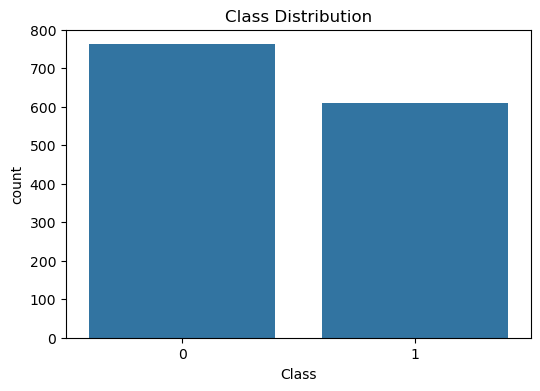

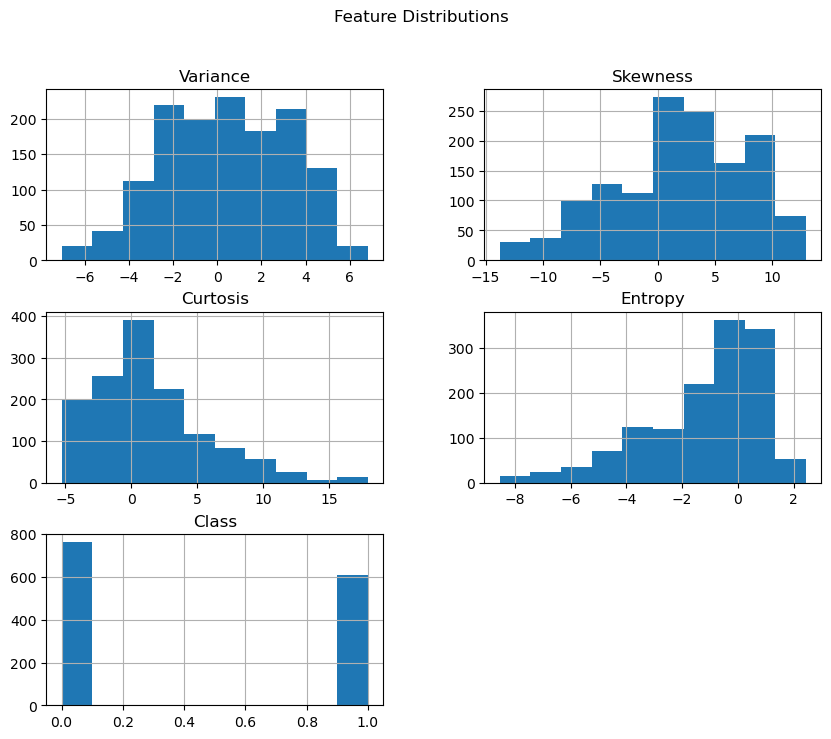

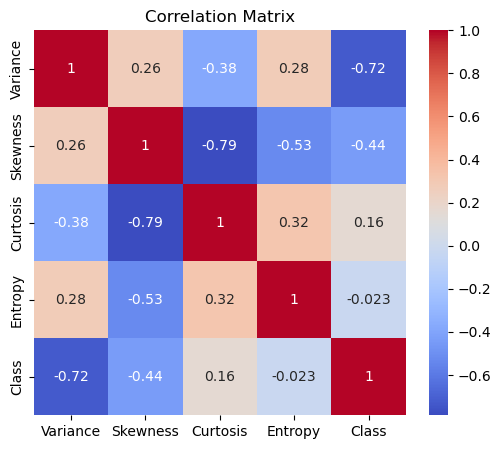


Logistic Regression Accuracy:
0.9781553398058253

Confusion Matrix:
[[220   9]
 [  0 183]]


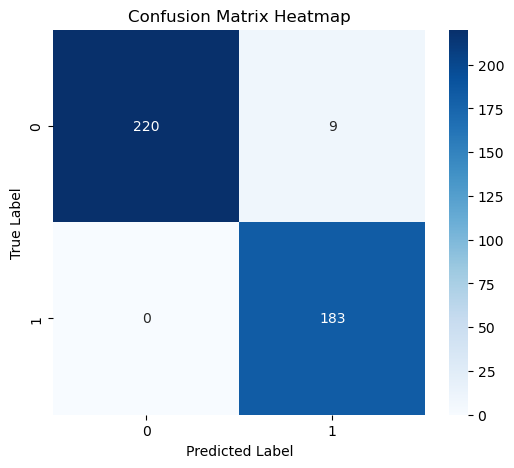


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       229
           1       0.95      1.00      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412


Cross-validation scores:
[0.98545455 0.97818182 0.97080292 0.99270073 0.98175182]
Mean CV accuracy: 0.9817783676177836


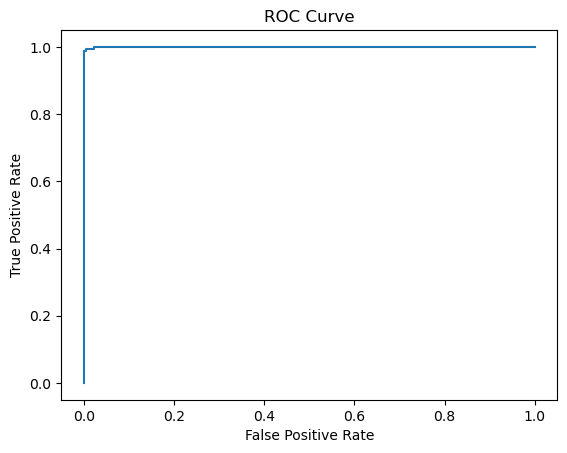

AUC Score: 0.9998568258286205

Feature Importance:
Variance   -4.552400
Skewness   -4.574379
Curtosis   -4.189267
Entropy     0.177081
dtype: float64

Linear Regression MSE:
0.03241195393577641
Linear Regression R2:
0.8687156153178602


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_squared_error,
    r2_score,
    roc_curve,
    auc
)


df = pd.read_csv("bill_authentication.csv")
df.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

print("First rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())


print("\nDescriptive statistics:")
print(df.describe())

# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

# Histograms
df.hist(figsize=(10,8))
plt.suptitle("Feature Distributions")
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


X = df.drop("Class", axis=1)
y = df["Class"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\nLogistic Regression Accuracy:")
print(accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(clf, X_scaled, y, cv=5)
print("\nCross-validation scores:")
print(cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# ROC Curve
y_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("AUC Score:", roc_auc)

# Feature Importance
importance = pd.Series(clf.coef_[0], index=X.columns)
print("\nFeature Importance:")
print(importance)


reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred_reg = reg.predict(X_test)

print("\nLinear Regression MSE:")
print(mean_squared_error(y_test, y_pred_reg))

print("Linear Regression R2:")
print(r2_score(y_test, y_pred_reg))